# Logisitc Regression (like MNIST)

In [25]:
from sklearn.datasets import load_digits  # Hand Written Digits

import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


import seaborn as sn

# Load the data

In [26]:
digits = load_digits()

In [27]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# Plot some data

<Figure size 640x480 with 0 Axes>

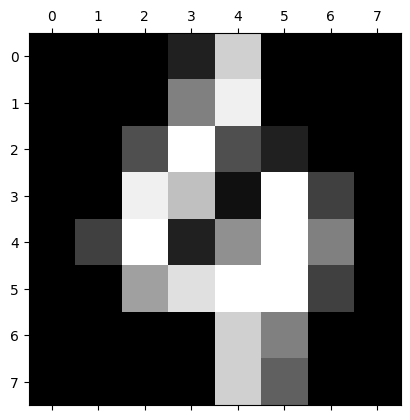

In [28]:
IMAGE_INDEX = 100

plt.gray()
plt.matshow(digits.images[IMAGE_INDEX])

In [29]:
# Show the label
digits.target[IMAGE_INDEX]

4

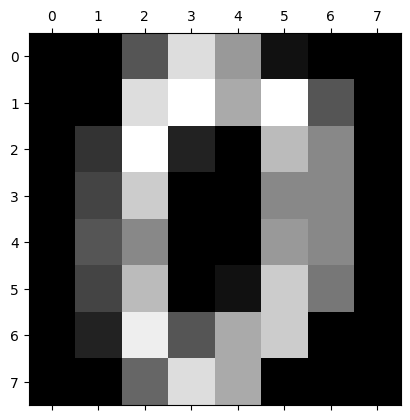

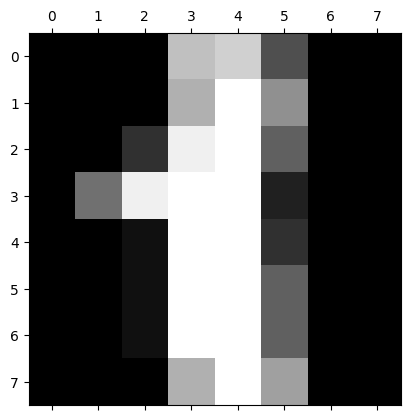

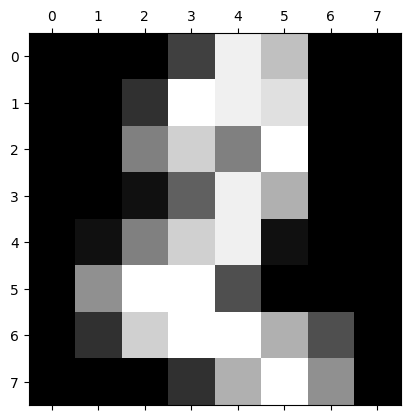

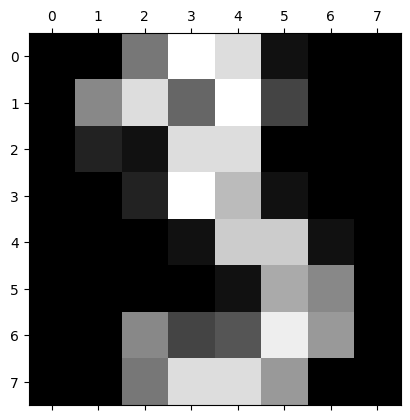

In [30]:
for i in range(4):
    plt.matshow(digits.images[i])

In [31]:
# Show the pixels of an image
digits.data[IMAGE_INDEX]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

# Split the data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

# Build and Train the model

In [33]:
model = LogisticRegression() 

model.fit(X_train, y_train)

c:\Python\Python31172\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Scoring

In [34]:
model.score(X_test, y_test)

0.9611111111111111

# Predictions

In [35]:
model.predict(digits.data[0:4])

array([0, 1, 2, 3])

# Confusion Matrix

In [36]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  1, 46,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 36,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  1,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 31]], dtype=int64)

## 1. Via Sklearn

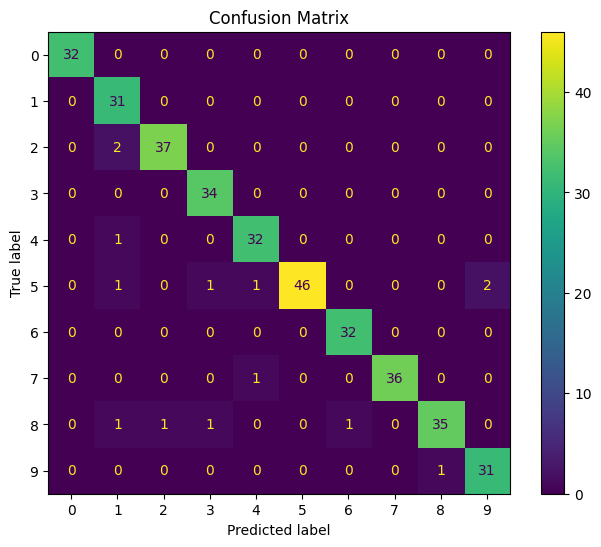

In [37]:
fig, ax = plt.subplots(figsize = (8,6))

display = ConfusionMatrixDisplay(cm, display_labels = model.classes_)

ax.set(title = "Confusion Matrix")

display.plot(ax = ax)

## 2. Via Seaborn

Text(50.722222222222214, 0.5, 'True')

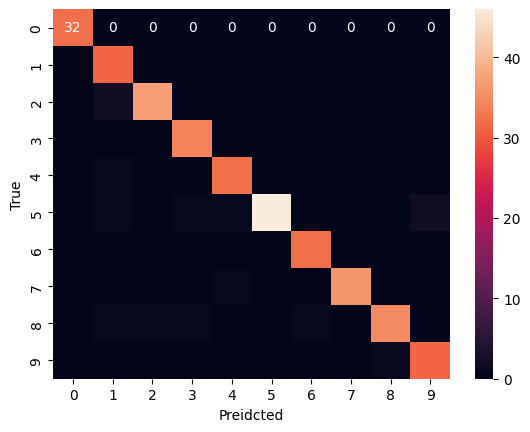

In [38]:
sn.heatmap(cm, annot=True)

plt.xlabel("Preidcted")
plt.ylabel("True")